**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO _VISUALISE MODEL CALIBRATION USING RELIABILITY DIAGRAMS_. 🧠📊📈**

This script demonstrates how to create **Reliability Diagrams**, which are enhanced visual versions of calibration curves. Reliability diagrams not only show predicted vs actual probabilities but also display the distribution of predictions across probability bins.

They help answer:

> *Are predicted probabilities reliable and how frequently does the model predict certain confidence levels?*
>

---

## **📦 Import Required Libraries**

We’ll use scikit-learn utilities and matplotlib for visualisation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve

---

## **🧩 Load the Dataset**

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

---

## **✂️ Split Data into Train and Test Sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

---

## **🤖 Train the Classification Model**

In [4]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


---

## **📊 Generate Predicted Probabilities**

In [5]:
y_probs = model.predict_proba(X_test)[:, 1]

---

## **📈 Compute Reliability Data**

In [6]:
prob_true, prob_pred = calibration_curve(
    y_test,
    y_probs,
    n_bins=10
)

---

## **🔍 Plot Reliability Diagram**

We create a two-panel plot:

- Top → Calibration curve
- Bottom → Histogram of prediction distribution

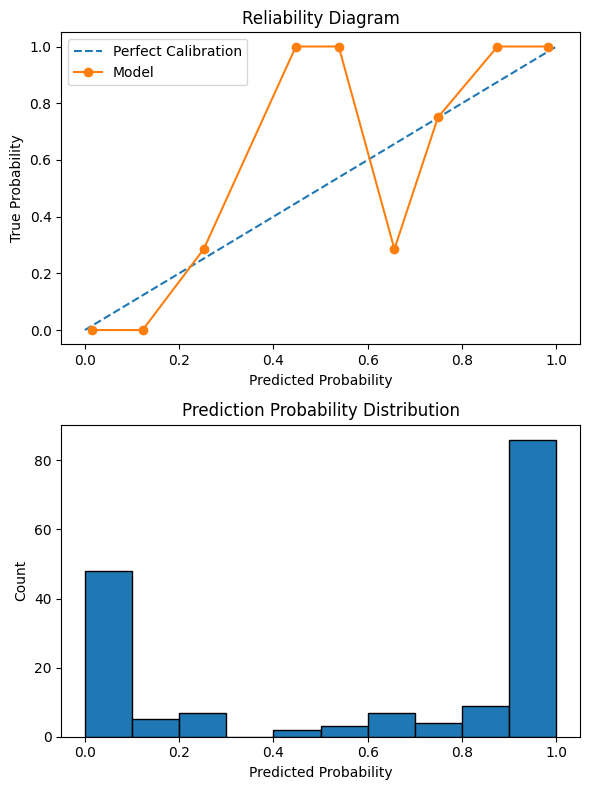

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Calibration curve
ax[0].plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration")
ax[0].plot(prob_pred, prob_true, marker="o", label="Model")
ax[0].set_xlabel("Predicted Probability")
ax[0].set_ylabel("True Probability")
ax[0].set_title("Reliability Diagram")
ax[0].legend()

# Probability distribution
ax[1].hist(y_probs, bins=10, edgecolor="black")
ax[1].set_xlabel("Predicted Probability")
ax[1].set_ylabel("Count")
ax[1].set_title("Prediction Probability Distribution")

plt.tight_layout()
plt.show()

---

## **🔎 Why Reliability Diagrams Matter**

Unlike simple calibration curves, reliability diagrams:

- Show calibration quality
- Reveal confidence concentration
- Identify prediction bias patterns
- Help detect overconfidence in specific ranges

They are especially useful in:

- Risk scoring systems
- Medical probability estimation
- Financial decision models

---

## **🧠 Key Takeaways**

1. Reliability diagrams extend calibration curves.
2. They show both calibration and probability distribution.
3. Overconfidence appears below the diagonal line.
4. Under-confidence appears above the diagonal line.
5. Essential for trustworthy probability-based systems.

---

## **Conclusion**

Reliability diagrams provide a deeper understanding of how well predicted probabilities align with actual outcomes. By combining calibration curves with prediction distribution analysis, they offer a more complete view of model reliability.

This strengthens the **Advanced Visualisation & Interpretability** toolkit within the **AI with Python** series.

---